In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
!pip install haversine
from haversine import haversine

from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [2]:

# Load the dataset
dataset = pd.read_csv('diabetes.csv')
print("Dataset Loaded:")
print(dataset.head())

Dataset Loaded:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   Pedigree  Age  Outcome  
0     0.627   50        1  
1     0.351   31        0  
2     0.672   32        1  
3     0.167   21        0  
4     2.288   33        1  


In [3]:

# Check for missing values
print("Missing values in each column:")
print(dataset.isnull().sum())

Missing values in each column:
Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64


In [4]:

# Input and output data
X = dataset.drop('Outcome', axis=1)  # Features
y = dataset['Outcome']  # Labels

In [5]:
# Feature scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0, test_size=0.25)

# Model training using K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [6]:
# Predicting the test set results
y_pred = knn.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[114  16]
 [ 31  31]]


In [7]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [8]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.7552
Error Rate: 0.2448
Precision: 0.6596
Recall: 0.5000


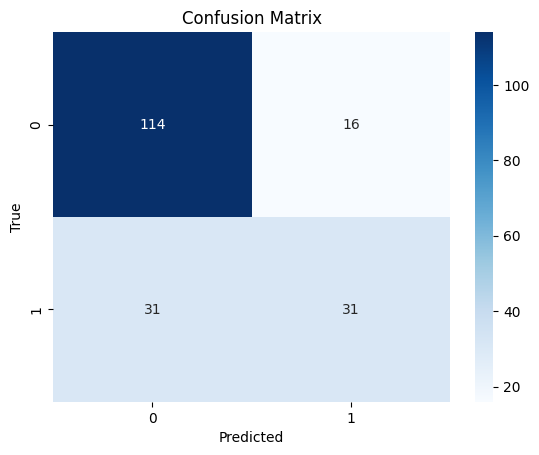

In [9]:
# Optional: Visualize the confusion matrix
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()